In [18]:
from sklearn.datasets import load_iris

In [19]:
iris=load_iris()

In [20]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
import pandas as pd

In [22]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df=df.drop(['petal length (cm)','petal width (cm)'], axis='columns')

In [52]:
df.head()
len(df)

150

In [29]:
import matplotlib.pylab as plt

Text(0, 0.5, 'sepal width')

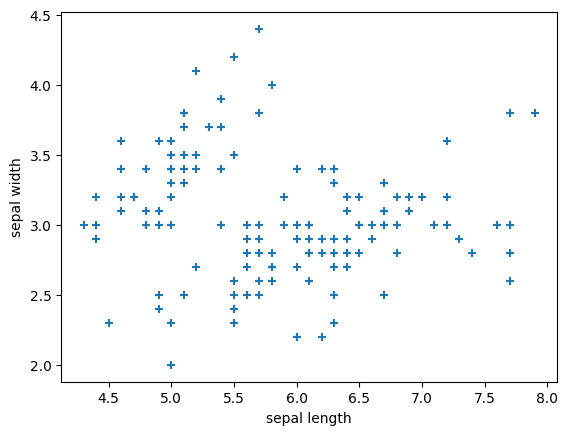

In [31]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],marker='+')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [32]:
from sklearn.cluster import KMeans

In [53]:
sse = []
k_rng = range(1,150)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

[130.4752666666667, 58.20409278906672, 37.05070212765958, 27.990212038303696, 21.02435270289721, 17.347913003663006, 14.87909493683694, 12.830523434898438, 11.20053751803752, 9.586607503607503, 8.51995021645022, 7.832551587301589, 7.139586838514086, 6.60571572871573, 6.097941309507489, 5.435549083269671, 4.977440386410976, 4.684225663225663, 4.625462606837609, 4.285849816849819, 3.8985601898101914, 3.7053455433455444, 3.360448051948053, 3.300631313131314, 2.921916971916973, 2.8353177655677655, 2.7210641580641592, 2.5691078088578094, 2.471720779220778, 2.310354201354201, 2.2416666666666676, 2.082416971916971, 1.9449487179487184, 1.8429722222222222, 1.7629811854811863, 1.620023809523809, 1.5224642857142858, 1.4391363636363637, 1.4146482683982686, 1.3363095238095242, 1.2934523809523806, 1.2680158730158726, 1.1825952380952385, 1.1351190476190482, 1.0422142857142855, 1.0168809523809519, 0.9742380952380947, 0.9015952380952378, 0.8765238095238095, 0.8456428571428568, 0.8060238095238091, 0.758

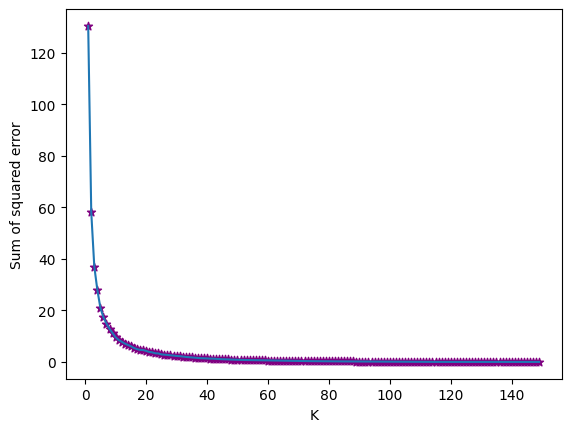

In [55]:
print(sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.scatter(k_rng,sse,color='purple',marker='*',label='centroid')

In [46]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted
df['cluster']=y_predicted
df.head()

d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


In [47]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

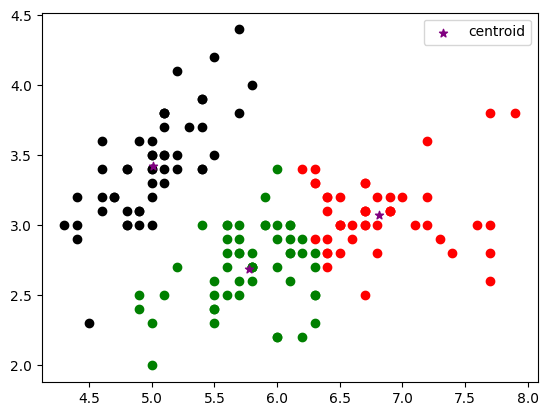

In [49]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


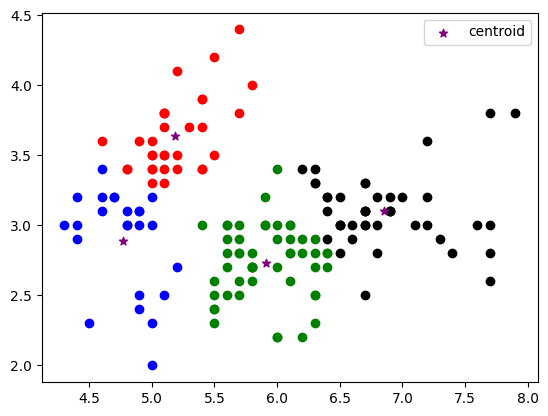

In [51]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted
df['cluster']=y_predicted
df.head()
km.cluster_centers_
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')
plt.scatter(df4['sepal length (cm)'],df4['sepal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
